# **Abstract** 

---

A region-based Deep Convolutional Neural Network framework is provided in this paper for learning document structure. Effective region-based classifier training and ensembling for document image classification are two key contributions of this work. By considering the RVL-CDIP dataset as a reference and the train_csv file, the 16,000 images are classified into 16 classes (letter, email, invoice, advertisement, etc). Hence the images are categorized based on their class label. They are applying common Convolutional Network architectures with DeepDocClassifier. Exporting weights from model architectures that have already been trained on the dataset is used to train a document classifier on complete document images, which is the first level of "inter-domain" transfer learning. Utilizing a region's unique characteristics to quickly train deep learning, transfer learning is utilized. Now shuffle the categorised images and split them into train and test. Now, this test and train are applied to each of the following individual models (document-image-transfer (DIT), VGG-16, LILT-only-base, LayoutLMv2) and store their predicted values in P1, P2, P3, and P4 respectively. These models are integrated to get a new model using multi-model integration and predicted values (P1, P2, P3, and P4) are stacked into a 1D array using stacked generalization with ML. Now the final predicted values are validated with the validation set to find the performance metrics.









Reamd me file - [link text](https://docs.google.com/document/d/1dqcKn50XfzDONaSJP-9SzFih53tgK7t5/edit?usp=sharing&ouid=109622198484902260098&rtpof=true&sd=true) :  https://docs.google.com/document/d/1dqcKn50XfzDONaSJP-9SzFih53tgK7t5/edit?usp=sharing&ouid=109622198484902260098&rtpof=true&sd=true

# **Extracting Dataset files from zip file**

Mouting the drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


* **Kaggle dataset of rvlcdip** [link text](https://drive.google.com/file/d/1fXJZ4FhZizLlwPy8zi86W6ia3wRvI-v4/view?usp=sharing) : https://drive.google.com/file/d/1fXJZ4FhZizLlwPy8zi86W6ia3wRvI-v4/view?usp=sharing

* Zip file name: datathonindoml-2022.zip

*  **Dirive link of the datset after classification according to the  train_lables.csv** [link text](https://drive.google.com/file/d/1blFsndANUWQ3qa0d-8AH7FfPfdhtZi_l/view?usp=sharing) : https://drive.google.com/file/d/1blFsndANUWQ3qa0d-8AH7FfPfdhtZi_l/view?usp=sharing

*  Zip file name : indoml_project.zip

In [ ]:
from zipfile import ZipFile


file_name = "/content/drive/MyDrive/datathonindoml-2022.zip"
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
	# printing all the contents of the zip file
	zip.printdir()

	# extracting all the files
	print('Extracting all the files now...')
	zip.extractall()
	print('Done!')

Streaming output truncated to the last 5000 lines.
train/train/6310.tif                           2022-08-09 08:07:24        97340
train/train/6311.tif                           2022-08-09 08:07:24       110054
train/train/6312.tif                           2022-08-09 08:07:24        60690
train/train/6313.tif                           2022-08-09 08:07:24        29496
train/train/6314.tif                           2022-08-09 08:07:24       297608
train/train/6315.tif                           2022-08-09 08:07:24        34334
train/train/6316.tif                           2022-08-09 08:07:24       338180
train/train/6317.tif                           2022-08-09 08:07:24       263634
train/train/6318.tif                           2022-08-09 08:07:24       509280
train/train/6319.tif                           2022-08-09 08:07:24        58184
train/train/632.tif                            2022-08-09 08:07:24        86334
train/train/6320.tif                           2022-08-09 08:07:24   

# **MODEL 1 DIT**

In [ ]:
pip install transformers

RESTARTED

In [ ]:
import os
import pandas as pd

Giving path of csv file

In [ ]:
labels=pd.read_csv('/content/drive/MyDrive/indoml/INDOML/datathonindoml-2022/train_labels.csv')

In [ ]:
labels

,id,label
0,0,1
1,1,13
2,2,13
3,3,14
4,4,6
...,...,...
15995,15995,2
15996,15996,15
15997,15997,3
15998,15998,9


Giving path of images after classification acording to the csv file

In [ ]:
b=0
for i in range(16):
    print('label'+str(i))
    a=len(os.listdir('/content/drive/MyDrive/indoml/INDOML/datathonindoml-2022/labels/label'+str(i)))
    b+=a
    print(a)
print('total images',b)

label0
1032
label1
969
label2
968
label3
993
label4
966
label5
1012
label6
1044
label7
965
label8
1059
label9
1000
label10
974
label11
1011
label12
1020
label13
1007
label14
992
label15
988
total images 16000


In [ ]:
X=labels['id']
y=labels['label']
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y ,random_state=104, test_size=0.2, shuffle=True)
  

In [ ]:
X_test.shape,X_train.shape

((3200,), (12800,))

In [ ]:
y_test.shape,y_train.shape

((3200,), (12800,))

In [ ]:


from transformers import AutoFeatureExtractor, AutoModelForImageClassification
import torch
from PIL import Image
def predict(path):
    dic={"0": "letter",
          "1": "form",
          "2": "email",
          "3": "handwritten",
          "4": "advertisement",
          "5": "scientific report",
          "6": "scientific publication",
          "7": "specification",
          "8": "file folder",
          "9": "news article",
          "10": "budget",
          "11": "invoice",
          "12": "presentation",
          "13": "questionnaire",
          "14": "resume",
          "15": "memo"}

    image = Image.open(path).convert('RGB')

    feature_extractor = AutoFeatureExtractor.from_pretrained("microsoft/dit-base-finetuned-rvlcdip")
    model = AutoModelForImageClassification.from_pretrained("microsoft/dit-base-finetuned-rvlcdip")

    inputs = feature_extractor(images=image, return_tensors="pt")
    outputs = model(**inputs)
    logits = outputs.logits

    # model predicts one of the 16 RVL-CDIP classes
    predicted_class_idx = logits.argmax(-1).item()
    #print("Predicted class:", model.config.id2label[predicted_class_idx])
    return predicted_class_idx

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

In [ ]:
a=[]
b=17800
for i in range(1,901):
    d=int(int(b)+int(i))
    c="/content/drive/MyDrive/indoml/INDOML/datathonindoml-2022/validation/validation"+'/'+str(d)+".tif"
    a.append(predict(c))
    print(len(a),d,i)
arr=a
    
    

Downloading:   0%|          | 0.00/302 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/343M [00:00<?, ?B/s]

1 17801 1
2 17802 2
3 17803 3
4 17804 4
5 17805 5
6 17806 6
7 17807 7
8 17808 8
9 17809 9
10 17810 10
11 17811 11
12 17812 12
13 17813 13
14 17814 14
15 17815 15
16 17816 16
17 17817 17
18 17818 18
19 17819 19
20 17820 20
21 17821 21
22 17822 22
23 17823 23
24 17824 24
25 17825 25
26 17826 26
27 17827 27
28 17828 28
29 17829 29
30 17830 30
31 17831 31
32 17832 32
33 17833 33
34 17834 34
35 17835 35
36 17836 36
37 17837 37
38 17838 38
39 17839 39
40 17840 40
41 17841 41
42 17842 42
43 17843 43
44 17844 44
45 17845 45
46 17846 46
47 17847 47
48 17848 48
49 17849 49
50 17850 50
51 17851 51
52 17852 52
53 17853 53
54 17854 54
55 17855 55
56 17856 56
57 17857 57
58 17858 58
59 17859 59
60 17860 60
61 17861 61
62 17862 62
63 17863 63
64 17864 64
65 17865 65
66 17866 66
67 17867 67
68 17868 68
69 17869 69
70 17870 70
71 17871 71
72 17872 72
73 17873 73
74 17874 74
75 17875 75
76 17876 76
77 17877 77
78 17878 78
79 17879 79
80 17880 80
81 17881 81
82 17882 82
83 17883 83
84 17884 84
85 17885 8

**Predicting values**

In [ ]:
import pandas as pd
predicted=pd.DataFrame(a)
print(predicted.shape)

Storing predicted values into indoml123.csv

In [ ]:
predicted.to_csv('indoml123',index=True)

**Printing accuracy metrix**

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(predicted,y_test))

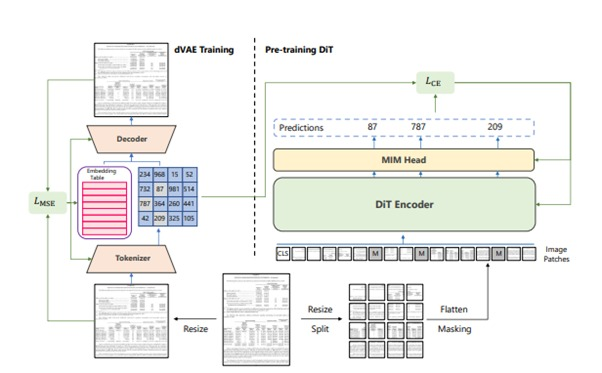

**Documentation**

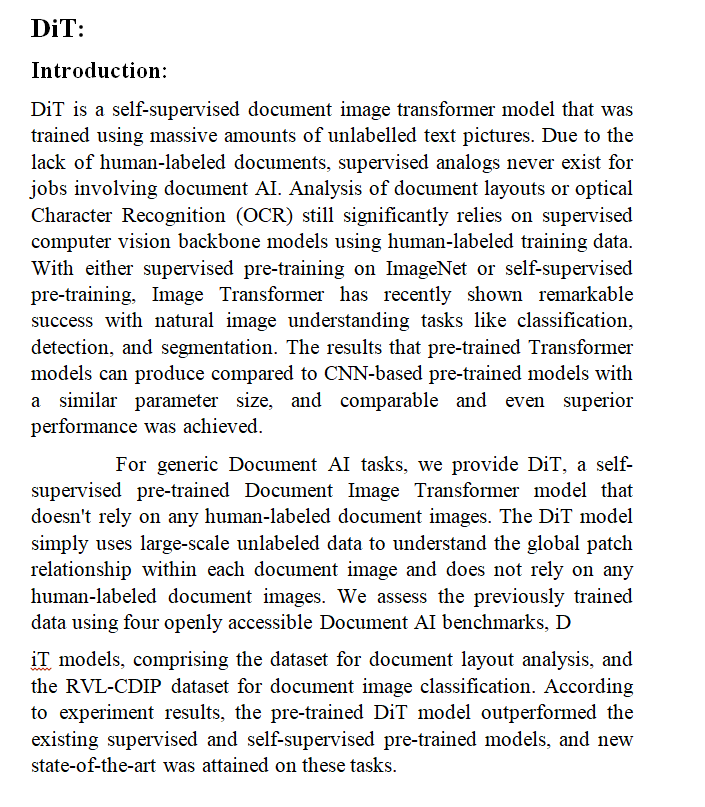

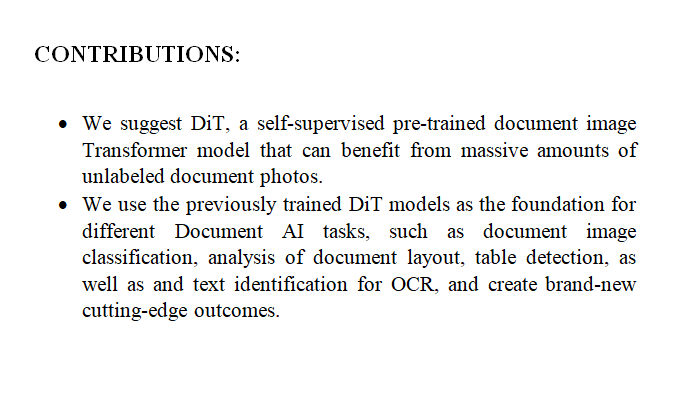

# **MODEL 2 Layoutlmv2**

In [ ]:
!pip install -q pyyaml==5.1
# workaround: install old version of pytorch since detectron2 hasn't released packages for pytorch 1.9 (issue: https://github.com/facebookresearch/detectron2/issues/3158)
!pip install -q torch==1.8.0+cu101 torchvision==0.9.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

# install detectron2 that matches pytorch 1.8

     |████████████████████████████████| 274 kB 31.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask 2022.2.0 requires pyyaml>=5.3.1, but you have pyyaml 5.1 which is incompatible.
     |████████████████████████████████| 763.5 MB 15 kB/s 
     |████████████████████████████████| 17.3 MB 17.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.13.1 requires torch==1.12.1, but you have torch 1.8.0+cu101 which is incompatible.
torchaudio 0.12.1+cu113 requires torch==1.12.1, but you have torch 1.8.0+cu101 which is incompatible.


In [ ]:
!pip install -q datasets

     |████████████████████████████████| 431 kB 37.9 MB/s 
     |████████████████████████████████| 212 kB 67.2 MB/s 
     |████████████████████████████████| 163 kB 61.9 MB/s 
     |████████████████████████████████| 115 kB 67.1 MB/s 


In [ ]:
! sudo apt install tesseract-ocr
! pip install -q pytesseract


Getting the data
Next, we download a small subset of the RVL-CDIP dataset (which I prepared), containing 15 documents (one example per class). I omitted the "handwritten" class, because the OCR results were mediocre.

In [ ]:
!pip install Pillow==9.0.0
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Pillow-9.0.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.3 MB)
  Attempting uninstall: Pillow
    Found existing installation: Pillow 5.3.0
    Uninstalling Pillow-5.3.0:
      Successfully uninstalled Pillow-5.3.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 28.3 MB/s 
     |████████████████████████████████| 6.6 MB 53.0 MB/s 


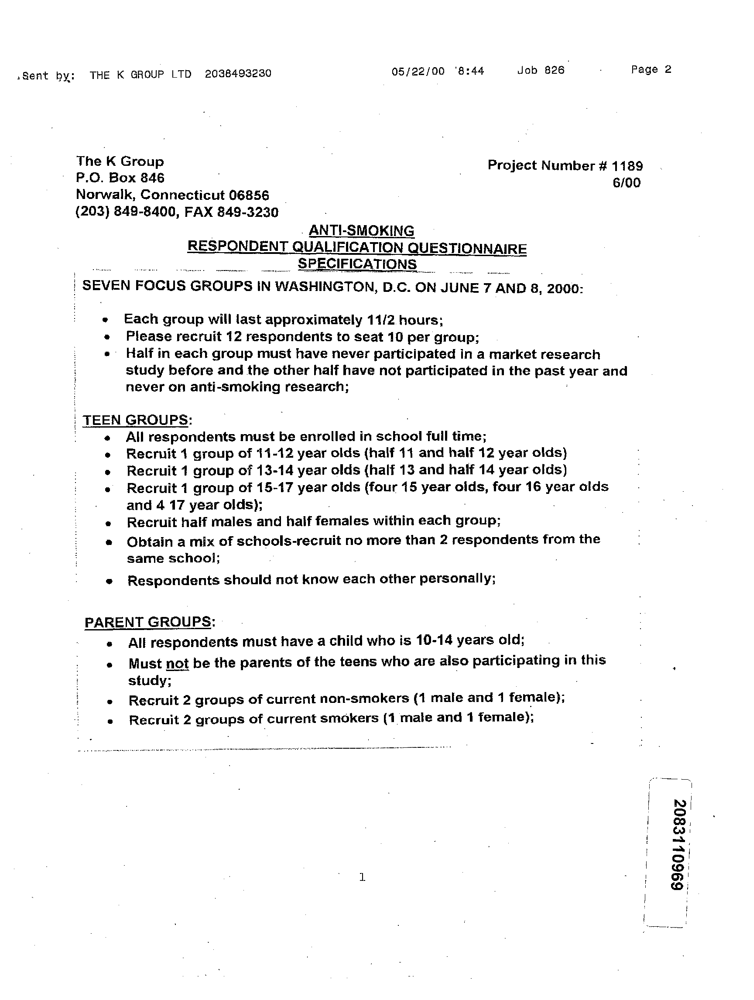

In [ ]:
from PIL import Image, ImageDraw, ImageFont

image = Image.open("/content/drive/MyDrive/indoml/INDOML/datathonindoml-2022/train/train/1.tif")
image = image.convert("RGB")
image

In [ ]:
import pytesseract
import numpy as np

ocr_df = pytesseract.image_to_data(image, output_type='data.frame')
ocr_df = ocr_df.dropna().reset_index(drop=True)
float_cols = ocr_df.select_dtypes('float').columns
ocr_df[float_cols] = ocr_df[float_cols].round(0).astype(int)
ocr_df = ocr_df.replace(r'^\s*$', np.nan, regex=True)
words = ' '.join([word for word in ocr_df.text if str(word) != 'nan'])
words

'sgent by: THE K GROUP LTD 209e4e9230 05/22/00 "8:44 Job 826 Page 2 The K Grou rT Norwalk, Connecticut 06856 (203) 849-8400, FAX 849-3230 ANTI-SMOKING RESPONDENT QUALIFICATION QUESTIONNAIRE ‘SPECIFICATIONS _ SEVEN FOCUS GROUPS IN WASHINGTON, D.C. ON JUNE 7 AND 8, 2000: + Each group will last approximately 11/2 hours; ‘+ Please recruit 12 respondents to seat 10 per group; Half in each group must have never participated in a market research study before and the other half have not participated in the past year and never on anti-smoking research; ‘EEN GROUPS: ‘* All respondents must be enrolled in school full time; «Recruit 1 group of 14-12 year olds (half 11 and half 12 year olds) © Recruit 1 group of 13-14 year olds (half 13 and half 14 year olds) © Recruit 1 group of 15-17 year olds (four 15 year olds, four 16 year olds and 4 17 year olds); + Recruit half males and half females within each group; Obtain a mix of schools-recruit no more than 2 respondents from the same school; * Respond

However, we can use LayoutLMv2Processor to easily prepare the data for the model. We give a document image as input to the processor, and it will create input_ids, attention_mask, token_type_ids and bbox for us. Internally, it will apply PyTesseract to get the words and bounding boxes, it will normalize the bounding boxes according to the size of the image, and it will turn everything into token-level inputs. It will also resize the document image to 224x224, as the model also requires an image input. Handy, isn't it?

Btw, if you prefer to use your own OCR engine, you still can. In that case, you can provide your own words and (normalized) bounding boxes to the processor.

In [ ]:
from transformers import LayoutLMv2FeatureExtractor, LayoutLMv2Tokenizer, LayoutLMv2Processor

feature_extractor = LayoutLMv2FeatureExtractor()
tokenizer = LayoutLMv2Tokenizer.from_pretrained("microsoft/layoutlmv2-base-uncased")
processor = LayoutLMv2Processor(feature_extractor, tokenizer)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/707 [00:00<?, ?B/s]

In [ ]:
encoded_inputs = processor(image, return_tensors="pt")

In [ ]:
for k,v in encoded_inputs.items():
  print(k, v.shape)

input_ids torch.Size([1, 335])
bbox torch.Size([1, 335, 4])
token_type_ids torch.Size([1, 335])
attention_mask torch.Size([1, 335])
image torch.Size([1, 3, 224, 224])


In [ ]:
gprocessor.tokenizer.decode(encoded_inputs.input_ids.squeeze().tolist())

'[CLS] sgent by : the k group ltd 209e4e9230 05 / 22 / 00 " 8 : 44 job 826 page 2 the k grou rt norwalk, connecticut 06856 ( 203 ) 849 - 8400, fax 849 - 3230 anti - smoking respondent qualification questionnaire ‘ specifications _ seven focus groups in washington, d. c. on june 7 and 8, 2000 : + each group will last approximately 11 / 2 hours ; ‘ + please recruit 12 respondents to seat 10 per group ; half in each group must have never participated in a market research study before and the other half have not participated in the past year and never on anti - smoking research ; ‘ een groups : ‘ * all respondents must be enrolled in school full time ; « recruit 1 group of 14 - 12 year olds ( half 11 and half 12 year olds ) © recruit 1 group of 13 - 14 year olds ( half 13 and half 14 year olds ) © recruit 1 group of 15 - 17 year olds ( four 15 year olds, four 16 year olds and 4 17 year olds ) ; + recruit half males and half females within each group ; obtain a mix of schools - recruit no m

First, we convert the dataset into a Pandas dataframe, having 2 columns: image_path and label.**bold text**

In [ ]:
labels={0: "letter",
    1: "form",
    2: "email",
    3: "handwritten",
    4: "advertisement",
    5: "scientific report",
    6: "scientific publication",
    7: "specification",
    8: "file folder",
    9: "news article",
    10: "budget",
    11: "invoice",
    12: "presentation",
    13: "questionnaire",
    14: "resume",
    15: "memo"}

In [ ]:
labels[1]

'form'

In [ ]:
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/indoml/INDOML/datathonindoml-2022/train_labels.csv")
data

,id,label
0,0,1
1,1,13
2,2,13
3,3,14
4,4,6
...,...,...
15995,15995,2
15996,15996,15
15997,15997,3
15998,15998,9


In [ ]:
import os
print(len(os.listdir("/content/drive/MyDrive/indoml/INDOML/datathonindoml-2022/train/train")))


16000


In [ ]:
images = []
label1 = []
dataset_path="/content/drive/MyDrive/indoml/INDOML/datathonindoml-2022/train/train"
for label_folder, _, file_names in os.walk(dataset_path):
  print(label_folder)
  
  for _, _, image_names in os.walk(label_folder):
    relative_image_names = []
    print(len(image_names))
    for image_file in image_names:
      relative_image_names.append(dataset_path + "/" + image_file)
      images.extend(relative_image_names)
      label1.append(labels[data['label'][int(image_file[:-4])]])
print(len(images))
print(len(label))
dataf = pd.DataFrame.from_dict({'image_path': relative_image_names, 'label': label1})
dataf.head()

/content/drive/MyDrive/indoml/INDOML/datathonindoml-2022/train/train
16000
128008000
16000


,image_path,label
0,/content/drive/MyDrive/indoml/INDOML/datathoni...,questionnaire
1,/content/drive/MyDrive/indoml/INDOML/datathoni...,scientific report
2,/content/drive/MyDrive/indoml/INDOML/datathoni...,advertisement
3,/content/drive/MyDrive/indoml/INDOML/datathoni...,email
4,/content/drive/MyDrive/indoml/INDOML/datathoni...,scientific publication


In [ ]:
from datasets import Dataset 

# read dataframe as HuggingFace Datasets object
dataset = Dataset.from_pandas(dataf)

In [ ]:
dataset

Dataset({
    features: ['image_path', 'label'],
    num_rows: 16000
})

Next, we set the format to PyTorch tensors. We also specify to put everything on the GPU (CUDA).

In [ ]:
from datasets import Features, Sequence, ClassLabel, Value, Array2D, Array3D

# we need to define custom features
features = Features({
    'image': Array3D(dtype="int64", shape=(3, 224, 224)),
    'input_ids': Sequence(feature=Value(dtype='int64')),
    'attention_mask': Sequence(Value(dtype='int64')),
    'token_type_ids': Sequence(Value(dtype='int64')),
    'bbox': Array2D(dtype="int64", shape=(512, 4)),
    'labels': ClassLabel(num_classes=len(labels), names=labels),
})

def preprocess_data(examples):
  # take a batch of images
  images = [Image.open(path).convert("RGB") for path in examples['image_path']]
  
  encoded_inputs = processor(images, padding="max_length", truncation=True)
  
  # add labels
  encoded_inputs["labels"] = [list(labels.keys())[list(labels.values()).index(label)] for label in examples["label"]]

  return encoded_inputs

encoded_dataset = dataset.map(preprocess_data, remove_columns=dataset.column_names, features=features, 
                              batched=True, batch_size=2)

  0%|          | 0/8000 [00:00<?, ?ba/s]

In [ ]:
encoded_dataset.set_format(type="torch", device="cuda")

We can create a PyTorch dataloader now:

In [ ]:
import torch

dataloader = torch.utils.data.DataLoader(encoded_dataset, batch_size=4)
batch = next(iter(dataloader))

In [ ]:
processor.tokenizer.decode(batch['input_ids'][0].tolist())

In [ ]:
id2label[batch['labels'][0].item()]

**Documentation**

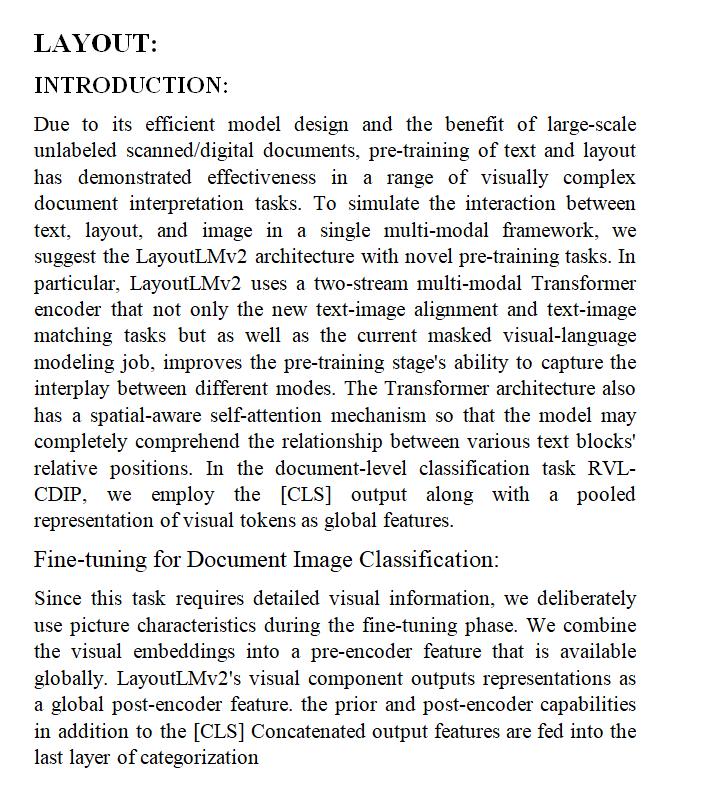

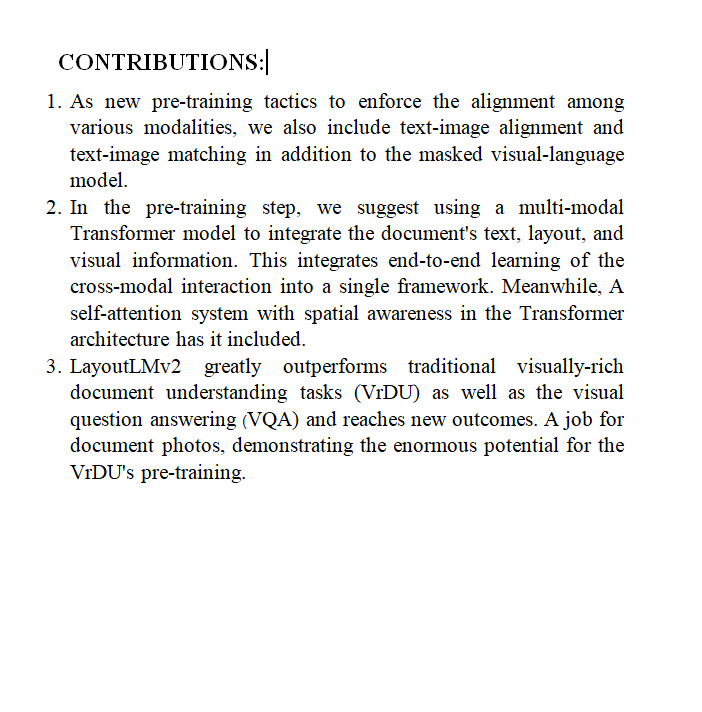

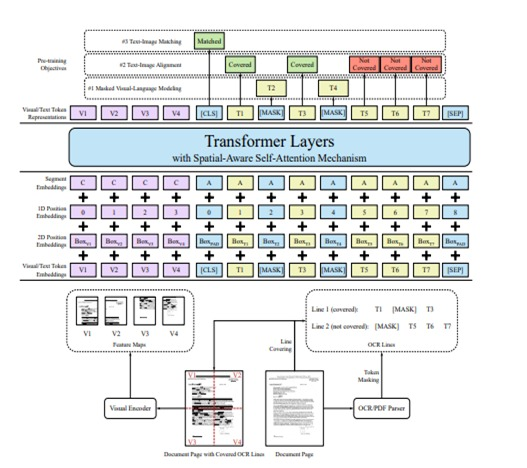

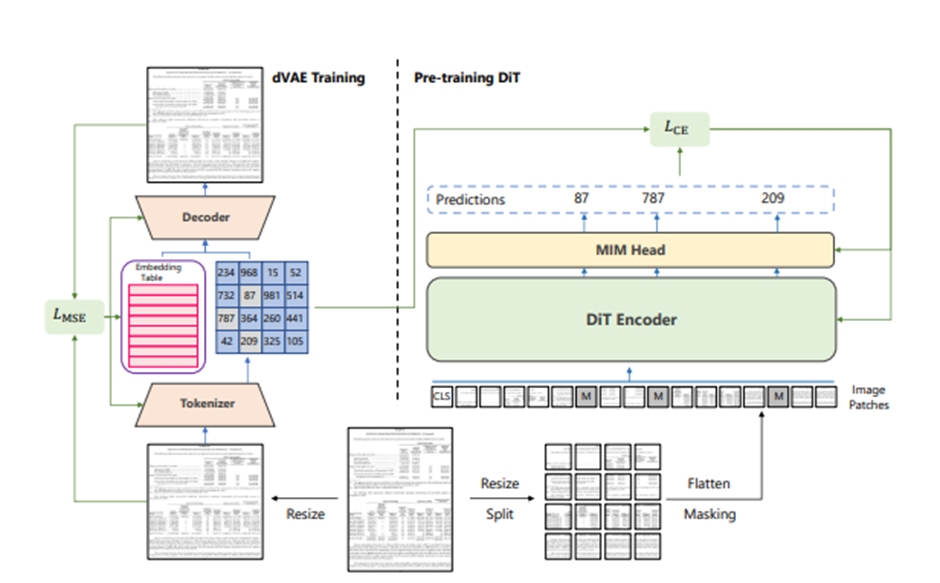

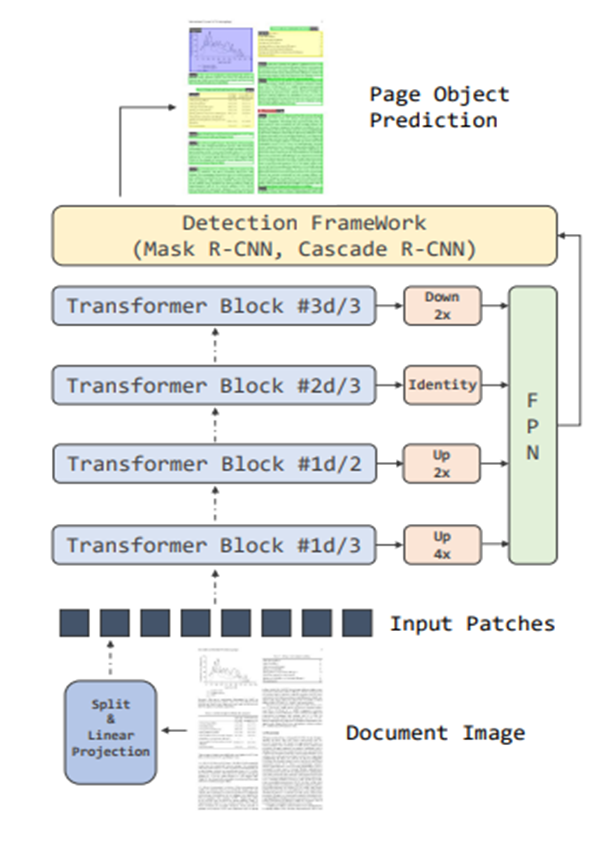

# **Model 3 Resnet Transfer**

In [ ]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from livelossplot import PlotLossesKeras
import tensorflow as tf
import pandas as pd
import random
from imutils import paths
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer
import cv2
import os
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import image


In [ ]:
IMAGE_SIZE = 224
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
EPOCHS =30
BATCH_SIZE =32
TEST_SIZE = 2
learning = 0.0001
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
%matplotlib inline

input_img = tf.keras.layers.Input(shape=(224, 224, 3))
baseModel =tf.keras.applications.resnet50.ResNet50(weights='imagenet',include_top=False ,input_tensor=tf.keras.layers.Input(shape=(224, 224, 3)))

for layer in baseModel.layers[:-3]:
    layer.trainable = False

x = baseModel.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=baseModel.input, outputs=predictions)
model.compile(optimizer=Adam(lr=learning, beta_1=0.9, beta_2=0.999, amsgrad=False), loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
from zipfile import ZipFile


file_name = "/content/drive/MyDrive/datathonindoml-2022.zip"
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
	# printing all the contents of the zip file
	zip.printdir()

	# extracting all the files
	print('Extracting all the files now...')
	zip.extractall()
	print('Done!')

Streaming output truncated to the last 5000 lines.
train/train/6310.tif                           2022-08-09 08:07:24        97340
train/train/6311.tif                           2022-08-09 08:07:24       110054
train/train/6312.tif                           2022-08-09 08:07:24        60690
train/train/6313.tif                           2022-08-09 08:07:24        29496
train/train/6314.tif                           2022-08-09 08:07:24       297608
train/train/6315.tif                           2022-08-09 08:07:24        34334
train/train/6316.tif                           2022-08-09 08:07:24       338180
train/train/6317.tif                           2022-08-09 08:07:24       263634
train/train/6318.tif                           2022-08-09 08:07:24       509280
train/train/6319.tif                           2022-08-09 08:07:24        58184
train/train/632.tif                            2022-08-09 08:07:24        86334
train/train/6320.tif                           2022-08-09 08:07:24   

In [ ]:
training_data_dir ="/content/train" 
validation_data_dir = "/content/validation" 

In [ ]:
TRAINING_LOGS_FILE = "train_labels.csv"
MODEL_SUMMARY_FILE = "model_summary.txt"

In [ ]:
with open(MODEL_SUMMARY_FILE,"w") as fh:
    model.summary(print_fn=lambda line: fh.write(line + "\n"))

training_data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
training_generator = training_data_generator.flow_from_directory(
    training_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="categorical")

validation_generator = validation_data_generator.flow_from_directory(
    validation_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False)

Found 16000 images belonging to 1 classes.
Found 900 images belonging to 1 classes.


In [ ]:
checkpoint_filepath = "weights-improvement-{epoch:02d}-{val_accuracy:.2f}.h5"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Training
H = model.fit_generator(
    training_generator,
    steps_per_epoch=len(training_generator.filenames) // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.filenames) // BATCH_SIZE,
    callbacks=[PlotLossesKeras(), CSVLogger(TRAINING_LOGS_FILE,
                                            append=False,
                                            separator=";")],
    verbose=1)

#model.save_weights(MODEL_FILE)

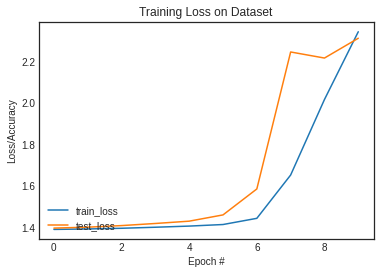

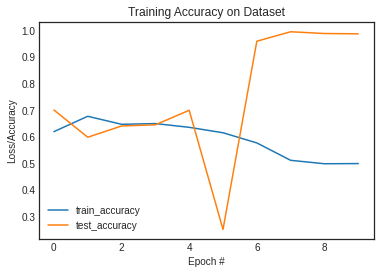

In [ ]:
N = EPOCHS
plt.style.use("seaborn-white")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="test_loss")
plt.title("Training Loss on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

plt.style.use("seaborn-white")
plt.figure()
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="test_accuracy")
plt.title("Training Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

In [ ]:
model=keras.models.load_model("/content/weights-improvement-08-0.63.h5")

Found 900 images belonging to 1 classes.


Confusion Matrix


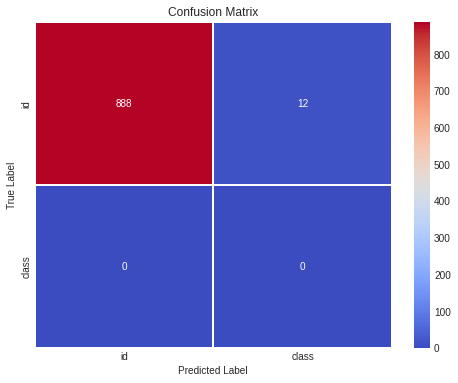

[[888  12]
 [  0   0]]
Classification Report
              precision    recall  f1-score   support

    covid-19       1.00      0.99      0.99       900
      normal       0.00      0.00      0.00         0

    accuracy                           0.99       900
   macro avg       0.50      0.49      0.50       900
weighted avg       1.00      0.99      0.99       900



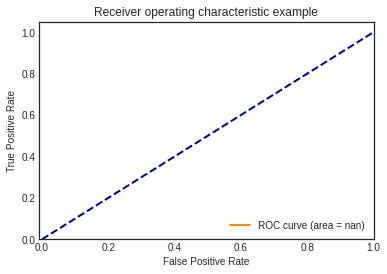

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

LABELS = ["id","class"]

def show_confusion_matrix(validations, predictions):
    matrix = confusion_matrix(validations,predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix,
                cmap="coolwarm",
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt="d")
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

validation_generator = validation_data_generator.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode="categorical",
    shuffle=False)    

filenames = validation_generator.filenames
nb_samples = len(filenames)

Y_pred = model.predict_generator(validation_generator,(nb_samples//BATCH_SIZE))
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
show_confusion_matrix(validation_generator.classes, y_pred)

print(confusion_matrix(validation_generator.classes, y_pred))

print('Classification Report')
target_names = ["class","id"]
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))
# Plot linewidth.
lw = 2
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
   fpr[i], tpr[i], _ = roc_curve(validation_generator.classes, y_pred)
   roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
       lw=lw, label='ROC curve (area = %0.4f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
model.evaluate_generator(training_generator)

[2.1182713508605957, 0.991937518119812]

In [ ]:
model.evaluate_generator(validation_generator)

[2.312063455581665, 0.9866666793823242]

Printing class lables of validation lables

In [ ]:
validation_generator.classes

In [ ]:
pred=resnet_model.predict(image)
print(pred)

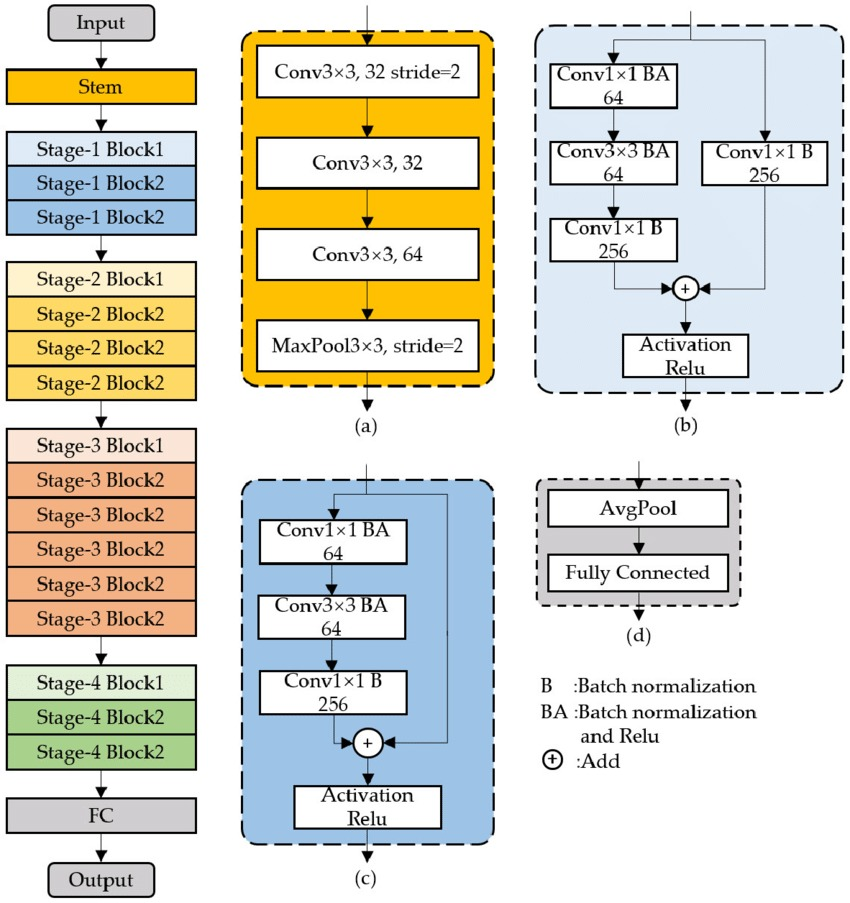

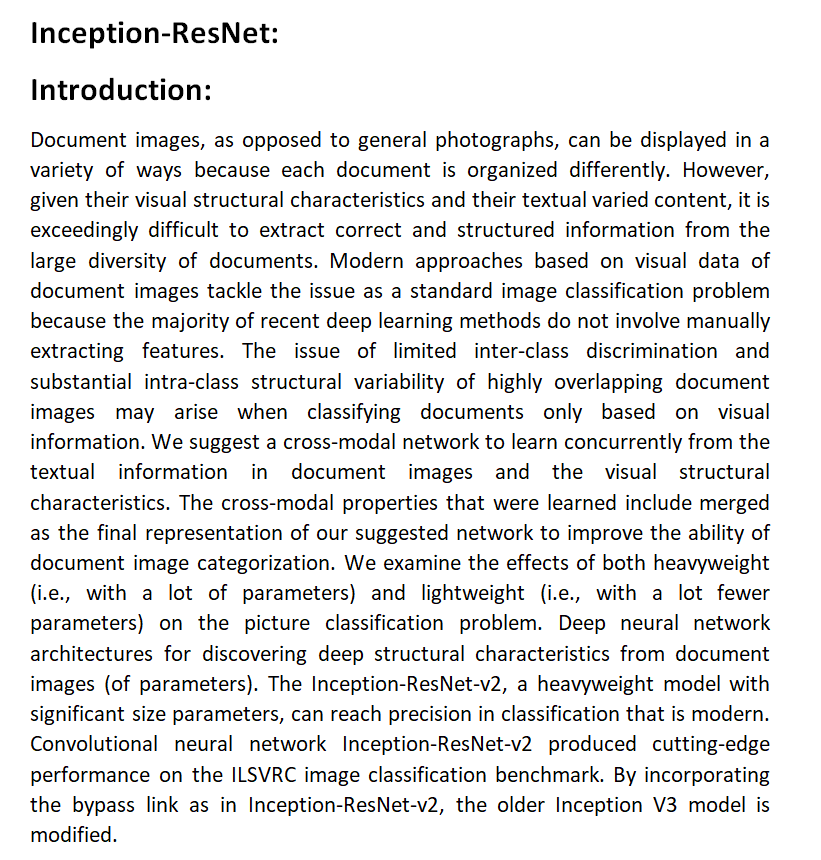

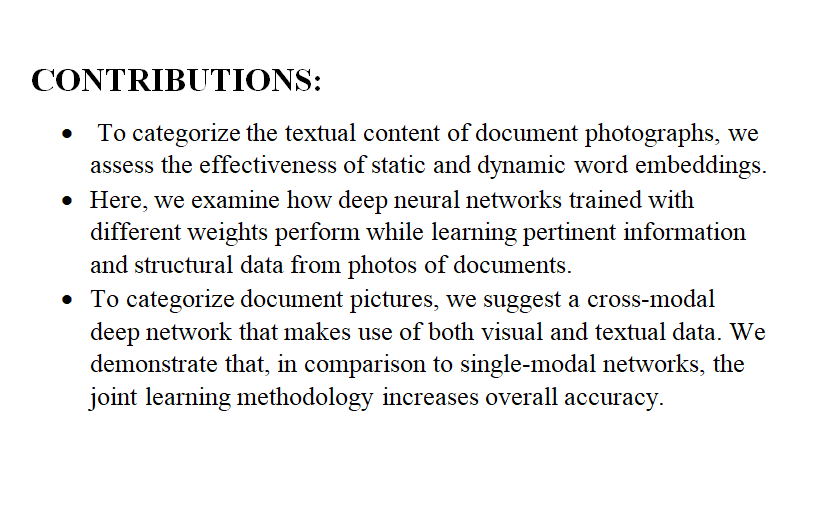

**The proposed cross-modal deep network**

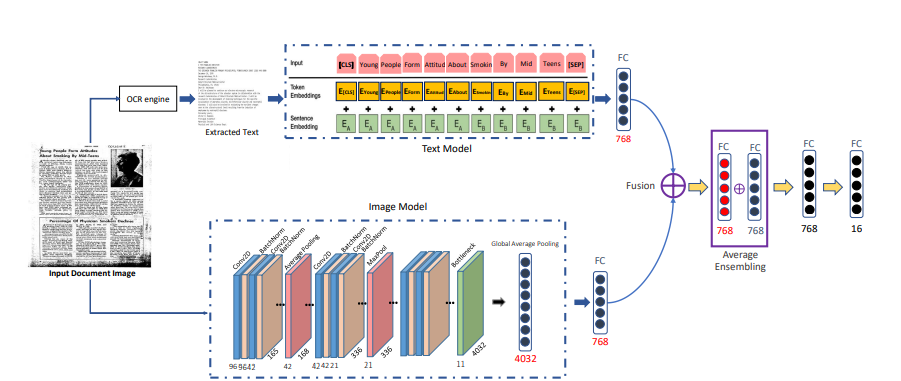

# **Model 4 VGG 19**

In [ ]:
!pip install livelossplot

In [ ]:
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from livelossplot import PlotLossesKeras
import tensorflow as tf
import pandas as pd

import random
from imutils import paths
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer
import cv2
import os
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import image


In [ ]:
IMAGE_SIZE = 180
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
EPOCHS =30
BATCH_SIZE =32
TEST_SIZE = 2
learning = 0.0001
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
%matplotlib inline

input_img = tf.keras.layers.Input(shape=(224, 224, 3))
baseModel =tf.keras.applications.vgg19.VGG19(weights='imagenet',include_top=False, input_tensor=tf.keras.layers.Input(shape=(224, 224, 3)))

for layer in baseModel.layers[:-3]:
    layer.trainable = False

x = baseModel.output
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization(axis=-1)(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Dropout(0.25)(x)

x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization(axis=-1)(x)

x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization(axis=-1)(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Dropout(0.25)(x)
    

x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization(axis=-1)(x)

x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization(axis=-1)(x)

x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization(axis=-1)(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Dropout(0.25)(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(2, activation='softmax')(x)
  
    
model = tf.keras.models.Model(baseModel.input, x)
adagrad=tf.keras.optimizers.Adagrad(lr=0.001)
model.compile(optimizer=adagrad, loss='binary_crossentropy',metrics=["accuracy"])


model.summary()

80142336/80134624 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")


Mounted at /content/gdrive


if not unzipped run the below cell

In [ ]:
from zipfile import ZipFile


file_name = "/content/drive/MyDrive/datathonindoml-2022.zip"
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
	# printing all the contents of the zip file
	zip.printdir()

	# extracting all the files
	print('Extracting all the files now...')
	zip.extractall()
	print('Done!')

Streaming output truncated to the last 5000 lines.
train/train/6310.tif                           2022-08-09 08:07:24        97340
train/train/6311.tif                           2022-08-09 08:07:24       110054
train/train/6312.tif                           2022-08-09 08:07:24        60690
train/train/6313.tif                           2022-08-09 08:07:24        29496
train/train/6314.tif                           2022-08-09 08:07:24       297608
train/train/6315.tif                           2022-08-09 08:07:24        34334
train/train/6316.tif                           2022-08-09 08:07:24       338180
train/train/6317.tif                           2022-08-09 08:07:24       263634
train/train/6318.tif                           2022-08-09 08:07:24       509280
train/train/6319.tif                           2022-08-09 08:07:24        58184
train/train/632.tif                            2022-08-09 08:07:24        86334
train/train/6320.tif                           2022-08-09 08:07:24   

In [ ]:
training_data_dir ="/content/train" 
validation_data_dir = "/content/validation"

In [ ]:
TRAINING_LOGS_FILE = "train_labels.csv"
MODEL_SUMMARY_FILE = "model_summary.txt"

In [ ]:
with open(MODEL_SUMMARY_FILE,"w") as fh:
    model.summary(print_fn=lambda line: fh.write(line + "\n"))

training_data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
training_generator = training_data_generator.flow_from_directory(
    training_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="categorical")

validation_generator = validation_data_generator.flow_from_directory(
    validation_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False)

In [ ]:
checkpoint_filepath = "weights-improvement-{epoch:02d}-{val_accuracy:.2f}.h5"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


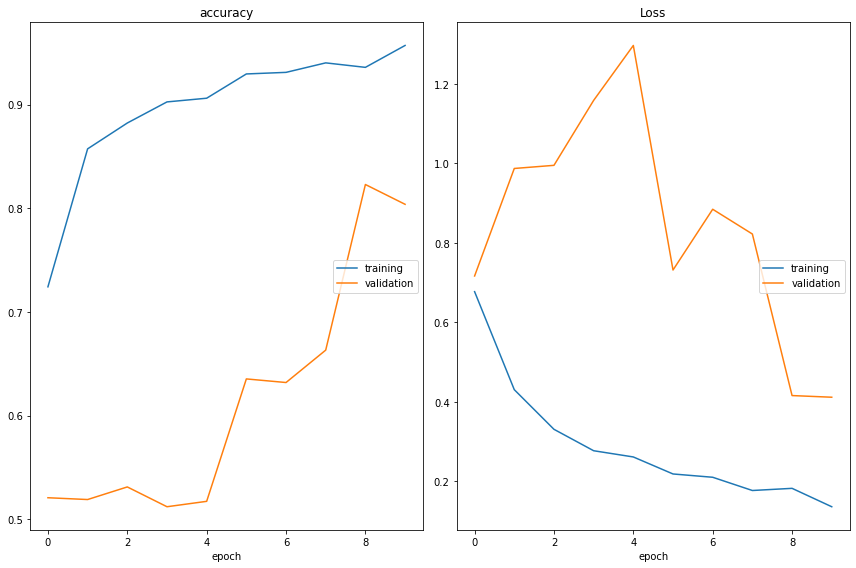

accuracy
	training         	 (min:    0.724, max:    0.957, cur:    0.957)
	validation       	 (min:    0.512, max:    0.823, cur:    0.804)
Loss
	training         	 (min:    0.136, max:    0.677, cur:    0.136)
	validation       	 (min:    0.412, max:    1.297, cur:    0.412)


In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Training
H = model.fit_generator(
    training_generator,
    steps_per_epoch=len(training_generator.filenames) // BATCH_SIZE,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.filenames) // BATCH_SIZE,
    callbacks=[model_checkpoint_callback,PlotLossesKeras(), CSVLogger(TRAINING_LOGS_FILE,
                                            append=False,
                                            separator=";")],
    verbose=1)

#model.save_weights(MODEL_FILE)

In [ ]:
model=keras.models.load_model("/content/weights-improvement-09-0.82.h5")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

LABELS = ["id","class"]

def show_confusion_matrix(validations, predictions):
    matrix = confusion_matrix(validations,predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix,
                cmap="coolwarm",
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt="d")
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

validation_generator = validation_data_generator.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode="categorical",
    shuffle=False)    

filenames = validation_generator.filenames
nb_samples = len(filenames)

Y_pred = model.predict_generator(validation_generator,(nb_samples//BATCH_SIZE))
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
show_confusion_matrix(validation_generator.classes, y_pred)

print(confusion_matrix(validation_generator.classes, y_pred))

print('Classification Report')
target_names = ["id","class"]
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))
# Plot linewidth.
lw = 2
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
   fpr[i], tpr[i], _ = roc_curve(validation_generator.classes, y_pred)
   roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
       lw=lw, label='ROC curve (area = %0.4f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
model.evaluate_generator(training_generator)

[0.08832546323537827, 0.9689629077911377]

In [ ]:
model.evaluate_generator(validation_generator)

[0.41461002826690674, 0.824999988079071]

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
def compute_metrics(actuals, preds):
    accuracy = accuracy_score(actuals,preds)
    precision = precision_score(actuals,preds)
    recall = recall_score(actuals,preds)
    f1_scor = f1_score(actuals,preds)
    print(f"Accuracy Score: {accuracy}")
    print(f"Precision Score: {precision}")
    print(f"Recall Score: {recall}")
    print(f"F1 Score: {f1_score(actuals,preds)}")
    scores = [accuracy,precision,recall,f1_score(actuals,preds)]
    plt.figure(figsize=(7,5))
    plt.barh(["Accuracy","Precision","Recall","F1 Score"], scores)
    # plt.xlim([0.9,1.0])
    for index, value in enumerate(scores):
        plt.text(value, index, str(value)[:4])
    plt.show()
    
    

Accuracy Score: 0.825
Precision Score: 0.8764478764478765
Recall Score: 0.7566666666666667
F1 Score: 0.8121645796064402


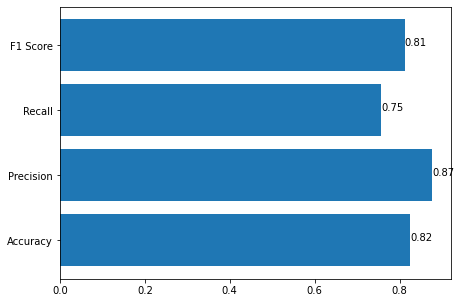

In [ ]:
compute_metrics(validation_generator.classes, y_pred)

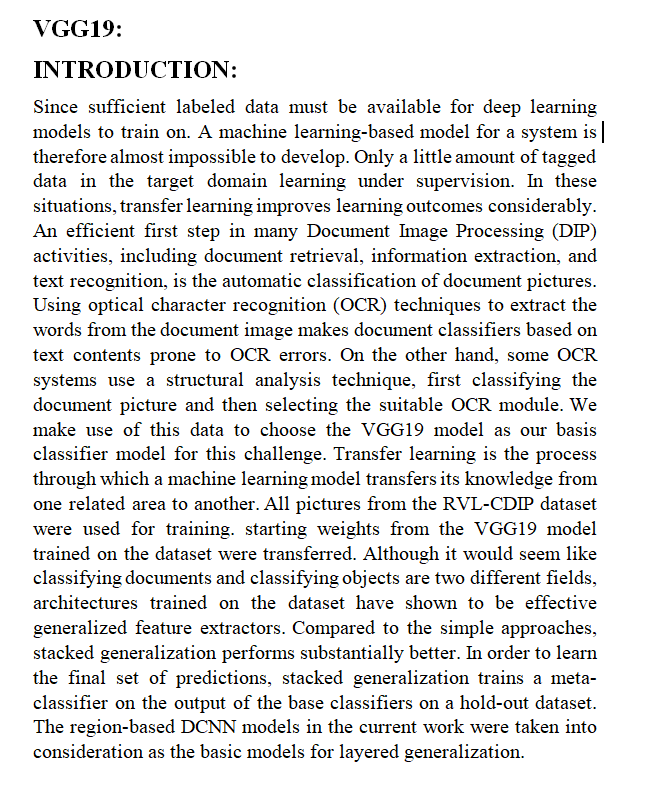

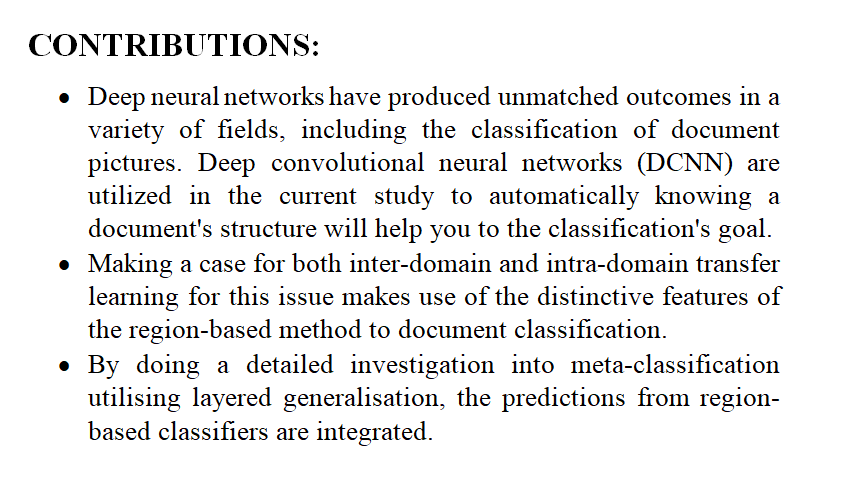

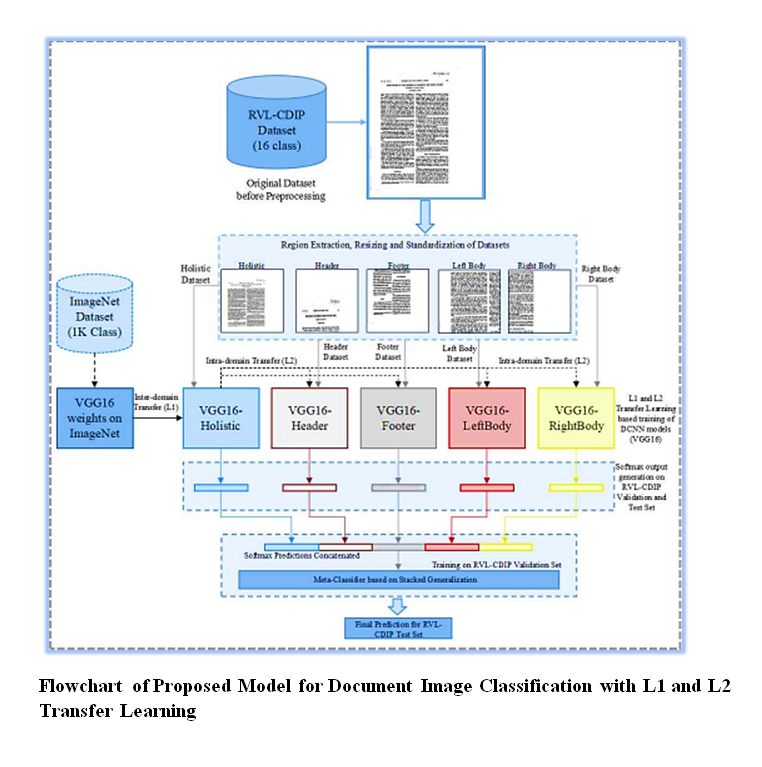

**MULTIMODEL** **STACK** **GENERALIZATION**
****

**Here we are stacking the predicted values of all the above models by using stack generalization**

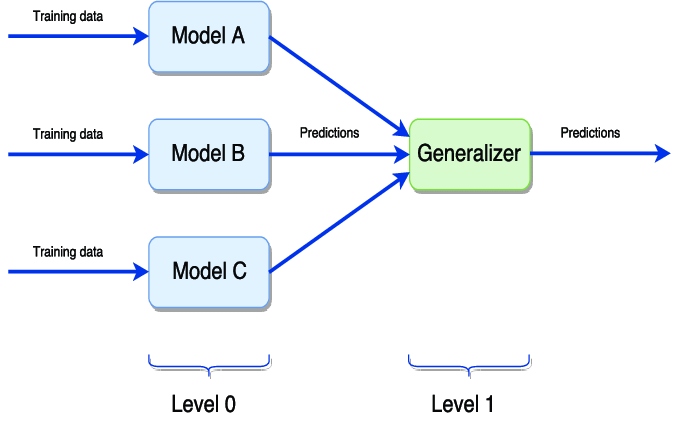

In [ ]:
# MULTIMODEL STACKING
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier

estimator_list = [
        ("dit", DIT()),
        ("layoutLMv2", LMv2()),
        ("vgg19", VGG19()),
        ("resnet50", ResNet50()),
    ]

stack_model1 = StackingClassifier(
        estimators=estimator_list, final_estimator=LMv2()
    )
stack_model2 = StackingClassifier(
        estimators=estimator_list, final_estimator=VGG19()
    )
stack_model3 = StackingClassifier(
        estimators=estimator_list, final_estimator=ResNet50()
    )

estimator_list = [
        ("layoutLMv2",stack_model1),
        ("vgg19", stack_model2),
        ("resnet50", stack_model3),
       
    ]
stack_model = StackingClassifier(
        estimators=estimator_list, final_estimator=DIT()
    )

stack_model.fit(X_train, y_train)
y_pred = stack_model.predict(X_test)
score = classification_report(y_test, y_pred)
print(score)
print(round(accuracy_score(y_test,y_pred)*100,2))
print(round(precision_score(y_test,y_pred)*100,2))
print(round(recall_score(y_test,y_pred)*100,2))
print(round(f1_score(y_test,y_pred)*100,2))